In [1]:
import pandas as pd

# Time series / date functionality in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas

## 1) Timestamp objects
* Pandas has built-in TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

#### `pd.to_datetime()`

- You can use a lot of different formats to convert a string into a Timestamp

In [2]:
pd.to_datetime('02 March 2020')

Timestamp('2020-03-02 00:00:00')

In [3]:
pd.to_datetime('03/02/2020')

Timestamp('2020-03-02 00:00:00')

In [4]:
pd.to_datetime('02-03-2020', dayfirst=True)

Timestamp('2020-03-02 00:00:00')

In [5]:
pd.to_datetime('02.03.2020', dayfirst=True)

Timestamp('2020-03-02 00:00:00')

- You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

In [6]:
dates = ['02 March 2020', '03/04/2020']

In [8]:
pd.to_datetime(dates, format="%d/%m/%Y")

ValueError: time data '02 March 2020' does not match format '%d/%m/%Y' (match)

#### `pd.date_range()`

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [9]:
import datetime

In [10]:
end = datetime.datetime.now()

In [11]:
dt_range = pd.date_range('14 February 2020', end=end, freq='H')

In [12]:
dt_range[2].nanosecond

0

In [13]:
pd.Series(dt_range)

0     2020-02-14 00:00:00
1     2020-02-14 01:00:00
2     2020-02-14 02:00:00
3     2020-02-14 03:00:00
4     2020-02-14 04:00:00
              ...        
416   2020-03-02 08:00:00
417   2020-03-02 09:00:00
418   2020-03-02 10:00:00
419   2020-03-02 11:00:00
420   2020-03-02 12:00:00
Length: 421, dtype: datetime64[ns]

### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [28]:
df = pd.read_csv('train.csv', parse_dates=True, index_col=0)
#df = df.reset_index()
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [29]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
df.datetime = pd.to_datetime(df.datetime)

In [30]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [35]:
type(df.datetime[0])

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [32]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [36]:
df['2011-01-01 00']

KeyError: '2011-01-01 00'

In [34]:
df.loc['2011-01-01 00']

season         1.000
holiday        0.000
workingday     0.000
weather        1.000
temp           9.840
atemp         14.395
humidity      81.000
windspeed      0.000
casual         3.000
registered    13.000
count         16.000
Name: 2011-01-01 00:00:00, dtype: float64

In [108]:
#df.index.resolution = 'minute'

#### `df.between_time()`

In [111]:
df.between_time('00:00:00', '03:00:00')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18 03:00:00,4,0,1,1,17.22,21.210,88,12.9980,0,5,5
2012-12-19 00:00:00,4,0,1,1,12.30,15.910,61,0.0000,6,35,41
2012-12-19 01:00:00,4,0,1,1,12.30,15.910,65,6.0032,1,14,15


In [118]:
df['minute'] = df.index.minute

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='datetime', length=10886)

## 2) Timedelta objects

Pandas has built-in Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) `pd.to_timedelta()`
    - 2) `pd.timedelta_range()`
    - 3) Subtract two pd.Timestamp objects

In [132]:
time_difference = df.index.max() - df.index.min()

In [148]:
time_difference.days/7

102.57142857142857

In [145]:
pd.to_timedelta(['20110103', '20110101'], unit='D')

TimedeltaIndex(['00:00:00.020110', '00:00:00.020110'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.timedelta_range()

## Other concepts: `resample()`, `shift()` and `rolling()`

In [149]:
df.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [167]:
downsampled = df.resample('D').sum()

In [165]:
upsample = downsampled.resample('H').interpolate()

In [166]:
upsample.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.583333,14.110833,18.181250,80.583333,10.749871,13.791667,27.250000,41.041667
2011-01-01 01:00:00,1.0,0.0,0.0,1.598883,14.143824,18.160654,80.126057,10.995798,13.454333,27.328351,40.782684
2011-01-01 02:00:00,1.0,0.0,0.0,1.614432,14.176815,18.140059,79.668780,11.241725,13.116999,27.406703,40.523702
2011-01-01 03:00:00,1.0,0.0,0.0,1.629982,14.209805,18.119463,79.211504,11.487652,12.779665,27.485054,40.264719
2011-01-01 04:00:00,1.0,0.0,0.0,1.645531,14.242796,18.098868,78.754227,11.733579,12.442331,27.563406,40.005737
2011-01-01 05:00:00,1.0,0.0,0.0,1.661081,14.275787,18.078272,78.296950,11.979506,12.104997,27.641757,39.746754
2011-01-01 06:00:00,1.0,0.0,0.0,1.676630,14.308777,18.057677,77.839674,12.225434,11.767663,27.720109,39.487772
2011-01-01 07:00:00,1.0,0.0,0.0,1.692180,14.341768,18.037081,77.382397,12.471361,11.430329,27.798460,39.228789
2011-01-01 08:00:00,1.0,0.0,0.0,1.707729,14.374758,18.016486,76.925121,12.717288,11.092995,27.876812,38.969807


In [174]:
df.head(27)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yesterday
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,17.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,17.0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,9.0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,6.0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,3.0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2.0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1.0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,8.0
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,20.0


In [172]:
df['tomorrow'] = df['count'].shift(24)

In [182]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yesterday
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,17.0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,17.0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,9.0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,6.0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,3.0


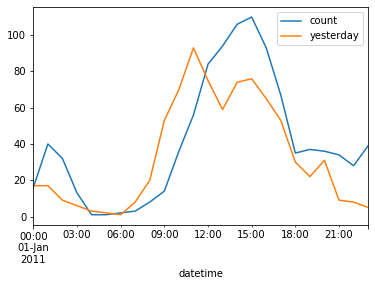

In [184]:
df['2011-01-01'][['count', 'yesterday']].plot()

In [190]:
df['rolling'] = df['count'].rolling(24, center=True).mean()

In [191]:
df.head(50)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,yesterday,rolling
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,17.0,NaN
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,17.0,NaN
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,9.0,NaN
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,6.0,NaN
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,3.0,NaN
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2.0,NaN
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1.0,NaN
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,8.0,NaN
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,20.0,NaN


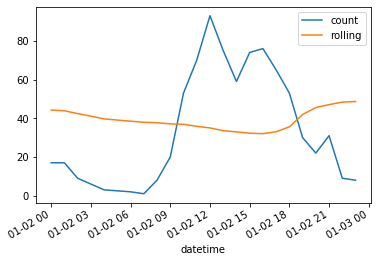

In [192]:
df['2011-01-02'][['count', 'rolling']].plot()